In [34]:
from __future__ import print_function
from link_bot_notebooks import notebook_finder
from link_bot_notebooks import toy_problem_optimization_common as tpo
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
np.set_printoptions(precision=6)

In [113]:
dataset = "../../../link_bot_teleop/data/random_50_steps.txt"
goal = np.zeros((6,1))
n_steps = 50
data = tpo.load_train(dataset, n_steps=n_steps, N=6, L=2, extract_func=tpo.link_pos_vel_extractor2(6))
print(data.shape)

(51, 8, 250)


speed 0.3071046529241636
distance error for xy model 1.4829311932978861
distance error for no dynamics model 0.11335887485404512
:'(


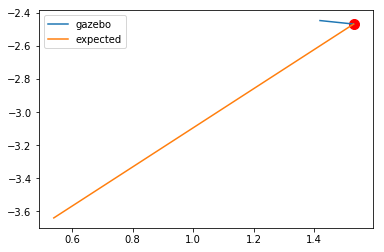

In [114]:
example_idx = 8
traj = data[:, :, example_idx]
vx = traj[0][6]
vy = traj[0][7]
s = traj[0][[0, 1]]
s_true = traj[n_steps][[0, 1]]
s_expected = s + np.array([vx, vy]) * 0.1 * n_steps
d_true = s_true - s
d_expected = s_expected - s
xy_error = s_true - s_expected
no_dynamics_error = s_true - s
xy_error_d = np.linalg.norm(xy_error)
no_dynamics_error_d = np.linalg.norm(no_dynamics_error)
print('speed', np.hypot(vx, vy))
print('distance error for xy model', xy_error_d)
print('distance error for no dynamics model', no_dynamics_error_d)
if xy_error_d > no_dynamics_error_d:
    print(":'(")
plt.scatter(s[0], s[1], s=100, c='r')
plt.plot([s[0], s_true[0]], [s[1], s_true[1]], label='gazebo')
plt.plot([s[0], s_expected[0]], [s[1], s_expected[1]], label='expected')
plt.legend();

In [118]:
f = 0.0
m = 0
xy_error_sum = 0
no_dynamics_error_sum = 0
for i in range(data.shape[2]):
    traj = data[:, :, i]
    vx = traj[0][6]
    vy = traj[0][7]
    s = traj[0][[0, 1]]
    s_true = traj[n_steps][[0, 1]]
    s_expected = s + np.array([vx, vy]) * 0.1 * (n_steps - 0)
    d_true = s_true - s
    d_expected = s_expected - s
    xy_error = s_true - s_expected
    no_dynamics_error = s_true - s
    xy_error_d = np.linalg.norm(xy_error)
    no_dynamics_error_d = np.linalg.norm(no_dynamics_error)
    xy_error_sum += xy_error_d
    no_dynamics_error_sum += no_dynamics_error_d
    if xy_error_d > no_dynamics_error_d:
        f+=1
        s=np.hypot(vx, vy)
        if s > m:
            m = s
#         print("NO DYNAMICS MODEL DOES BETTER for example ", i)
#         print('\tspeed', np.hypot(vx, vy))
#         print('\tdistance error for xy model', xy_error_d)
#         print('\tdistance error for no dynamics model', no_dynamics_error_d)
#         plt.scatter(s[0], s[1], s=100, c='r')
#         plt.plot([s[0], s_true[0]], [s[1], s_true[1]], label='gazebo')
#         plt.plot([s[0], s_expected[0]], [s[1], s_expected[1]], label='expected')
#         plt.legend();
xy_loss = xy_error_sum/ data.shape[2]
no_dynamics_loss = no_dynamics_error_sum/ data.shape[2]
print('loss of XY dynamics:', xy_loss)
print('loss of no dynamics:', no_dynamics_loss)
if xy_loss > no_dynamics_loss:
    print("VERY SAD.")
else:
    print("Success!!!")

loss of XY dynamics: 1.7919841946027308
loss of no dynamics: 1.9752064384975276
Success!!!


In [121]:
d_sum = 0
for i in range(data.shape[2]):
    traj = data[:, :, i]
    vx = traj[0][6]
    vy = traj[0][7]
    s = traj[0][[0, 1]]
    s_true = traj[n_steps][[0, 1]]
    d_true = np.linalg.norm(s_true - s)
    d_sum += d_true
    
print("average displacement for random {} time-step actions: {}".format(n_steps, d_sum / data.shape[2]))

average displacement for random 50 time-step actions: 1.9752064385
